In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import xgboost as xgb

In [3]:
data=pd.read_csv("/home/salini/Downloads/CHRISTY/Breast_cancer.csv")

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data['Class'] = data['Class'].map({2:0,4:1})

In [6]:
data.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [7]:
data.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
numcols=data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

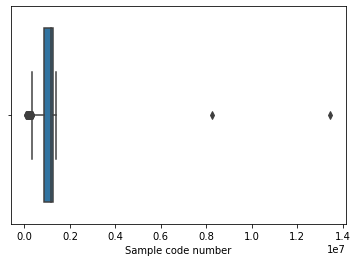

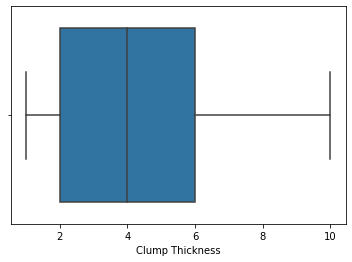

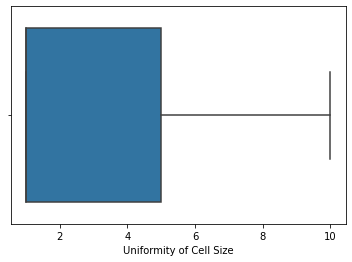

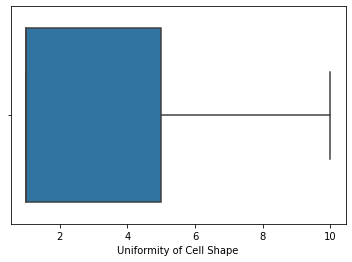

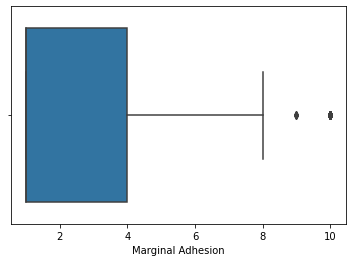

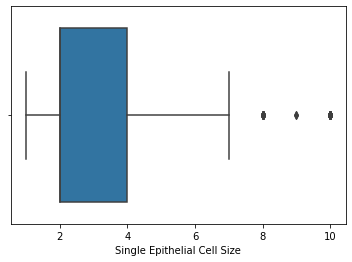

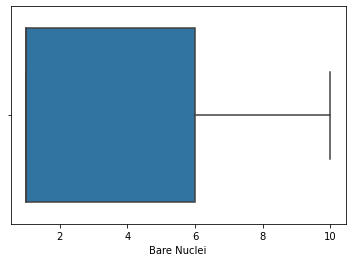

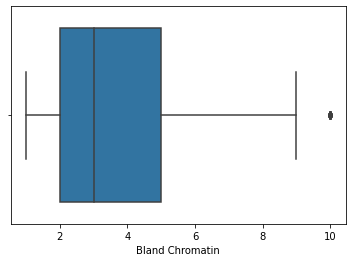

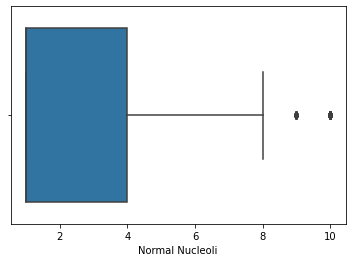

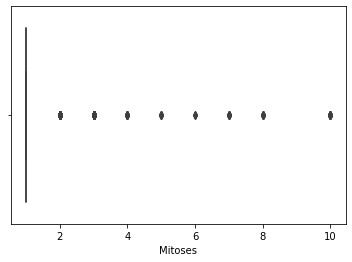

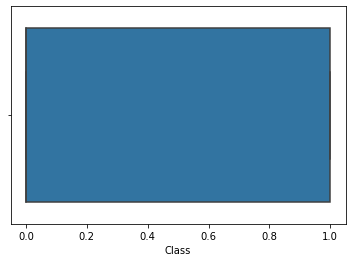

In [9]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [10]:
for x in numcols:
    descr=data[x].describe()
    IQR=descr['75%']-descr['25%']
    upper_limit=descr['75%']+1.5*IQR
    lower_limit=descr['25%']-1.5*IQR
    data[x][data[x]>upper_limit]=upper_limit
    data[x][data[x]<lower_limit]=lower_limit

<ipython-input-10-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-10-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-10-9ab08303e841>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit]=lower_limit
<ipython-input-10-9ab08303e841>:6: SettingWithCopyWarning: 
A value is tr

In [11]:
X=data.drop(['Class'],axis=1)
y=data['Class']

In [12]:
X.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1.0,2,1,3.0,1.0,1
1,1002945,5,4,4,5.0,7,10,3.0,2.0,1
2,1015425,3,1,1,1.0,2,2,3.0,1.0,1
3,1016277,6,8,8,1.0,3,4,3.0,7.0,1
4,1017023,4,1,1,3.0,2,1,3.0,1.0,1


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50) 

In [15]:
X_train

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
539,1313658,3,1,1,1.0,2,1,1.0,1.0,1
520,1061990,1,1,3,2.0,2,1,3.0,1.0,1
166,1200772,1,1,1,1.0,2,1,2.0,1.0,1
317,764974,5,1,1,1.0,2,1,3.0,1.0,1
136,1183240,4,1,2,1.0,2,1,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
70,1124651,1,3,3,2.0,2,1,7.0,2.0,1
132,1180831,3,1,1,1.0,3,1,2.0,1.0,1
289,636130,1,1,1,1.0,2,1,3.0,1.0,1
109,1171845,8,6,4,3.0,5,9,3.0,1.0,1


In [16]:
import xgboost as xgb
classifier = xgb.XGBClassifier()  #XGBClassifier object is created
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[146   2]
 [  2  76]]


0.9823008849557522

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 95.86 %


## Data Matrix

In [19]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [20]:
type(data_dmatrix)

xgboost.core.DMatrix

In [21]:
?xgb.XGBClassifier

In [22]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=5000,early_stopping_rounds=5,metrics="error", as_pandas=True, seed=123)

In [23]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.071743,0.005497,0.077556,0.029750
1,0.043924,0.005383,0.059993,0.017593
2,0.033679,0.008864,0.060012,0.008920
3,0.034408,0.005489,0.052709,0.007163
4,0.038068,0.006306,0.052709,0.010744
5,0.031476,0.005162,0.038063,0.001995
6,0.027086,0.001006,0.035139,0.000073
7,0.026355,0.000027,0.036608,0.002150
8,0.027086,0.001006,0.033684,0.004217
9,0.025622,0.002736,0.030747,0.003582


In [24]:
from sklearn.model_selection import GridSearchCV 

In [25]:
parameters={"objective":["binary:logistic"],'colsample_bytree': [0.3],'learning_rate': [0.1],
                'max_depth': [5], 'alpha': [10],'n_estimators':[6]}

In [26]:
xgb_final = GridSearchCV(classifier, parameters)
xgb_final.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [27]:
xgb_final.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1])

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xgb_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[146   2]
 [  3  75]]


0.9778761061946902